# Problem Statement
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters.
Draw the inferences from the clusters obtained.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [5]:
Airline=pd.read_csv("EastWestAirlines.csv")
Airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
#EDA

In [6]:
Airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
Airline.shape

(3999, 12)

In [8]:
df=Airline.drop(["ID#"],axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0
Days_since_enroll,3999.0,4118.559390,2065.134540,2.0,2330.0,4096.0,5790.5,8296.0


In [10]:
#Feature Scaling

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
Airline_norm = norm_func(df)
Airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [14]:
#Hierarchical Clustering

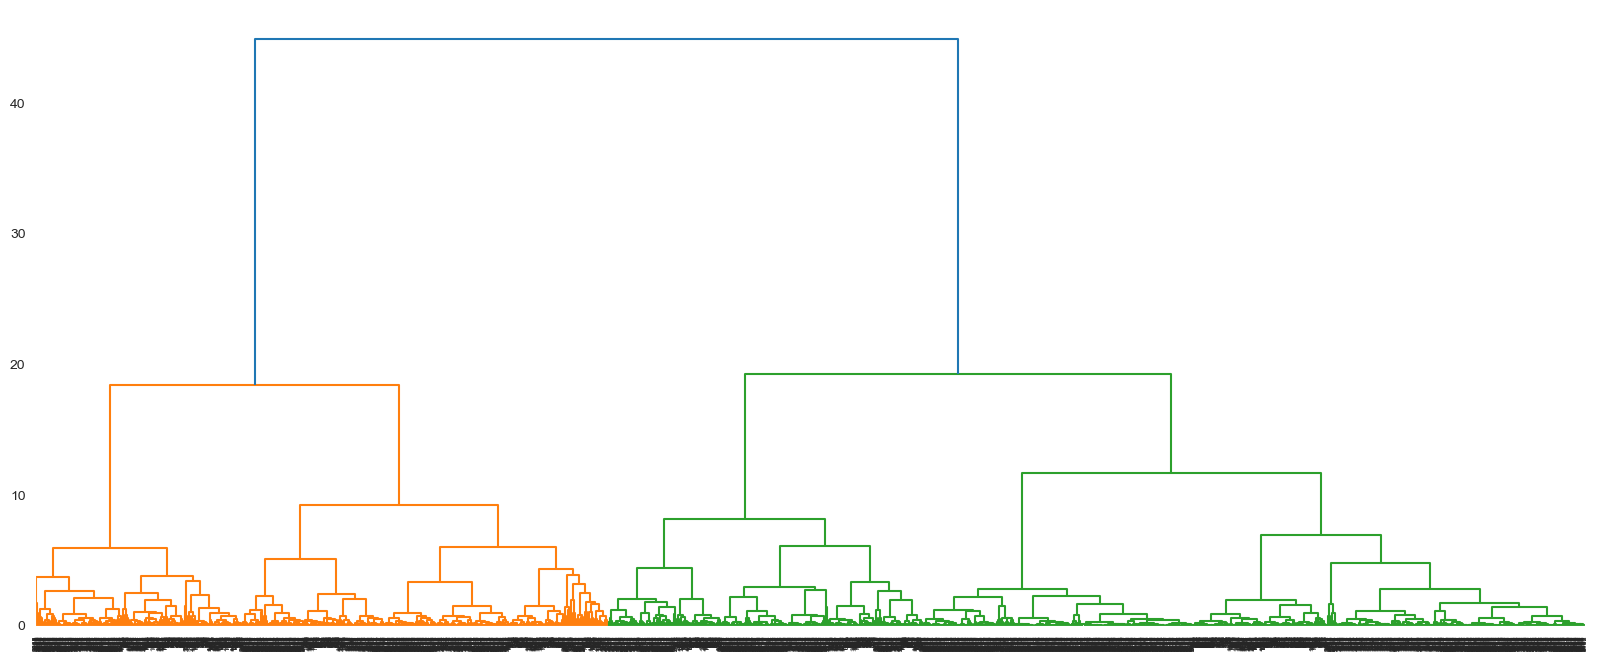

In [15]:
fig = plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(Airline_norm, method="ward"))

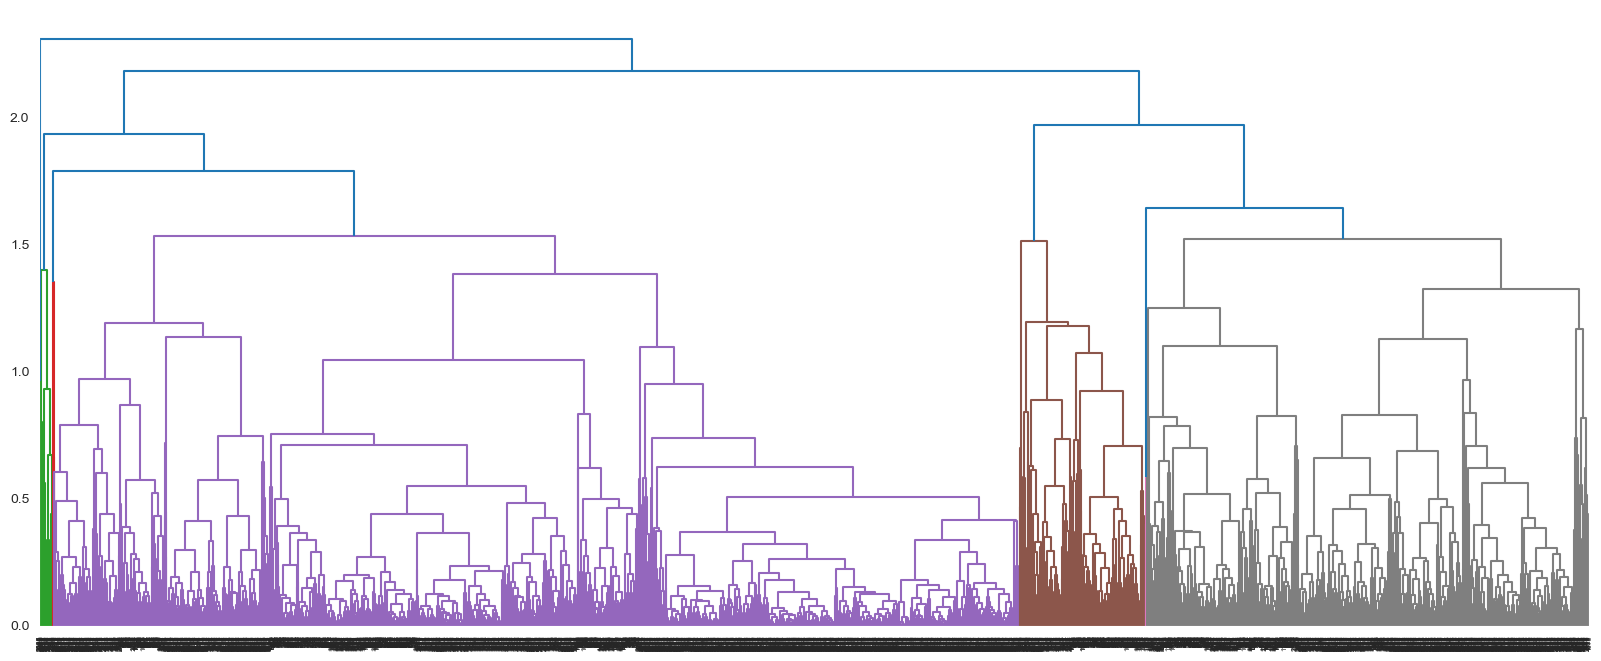

In [16]:
plt.figure(figsize=(20,8))  
dendograms=sch.dendrogram(sch.linkage(Airline_norm,'complete'))

In [17]:
# Ward Linkage
hc = AgglomerativeClustering(n_clusters=4)
df1 = hc.fit_predict(Airline_norm)

In [18]:
df1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
df['Cluster'] = df1

In [20]:
df.sort_values("Cluster")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
2384,25936,0,1,1,1,0,0,0,0,3495,0,0
2385,134318,0,1,1,1,333,3,258,1,3488,0,0
2386,32807,0,1,1,1,17259,4,0,0,3482,0,0
2389,10710,0,1,1,1,1000,1,0,0,3460,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3462,12088,0,4,1,1,27292,17,100,1,1298,1,3
1168,94896,0,4,1,1,38127,15,500,1,5602,1,3
1639,136104,0,4,1,1,68988,51,2069,8,4916,1,3
1645,164178,2364,4,1,1,35314,23,1100,3,4883,1,3


In [21]:
df['Cluster'].value_counts()

0    1710
1     946
2     808
3     535
Name: Cluster, dtype: int64

In [22]:
df.groupby('Cluster').agg('mean')

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Cluster,,,,,,,,,,,
0,37876.890058,52.797076,1.000000,1.019883,1.000585,2558.508187,5.730994,239.314035,0.697076,3562.376608,0.0
1,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0


In [23]:
 df[df['Cluster']==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
7,20856,0,1,1,1,5250,4,250,1,6938,1,1
8,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,1
17,13958,0,1,1,1,4291,5,0,0,6905,1,1
18,91473,0,3,1,1,27408,17,0,0,6903,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,1
3989,2622,0,1,1,1,1625,6,0,0,1404,1,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1


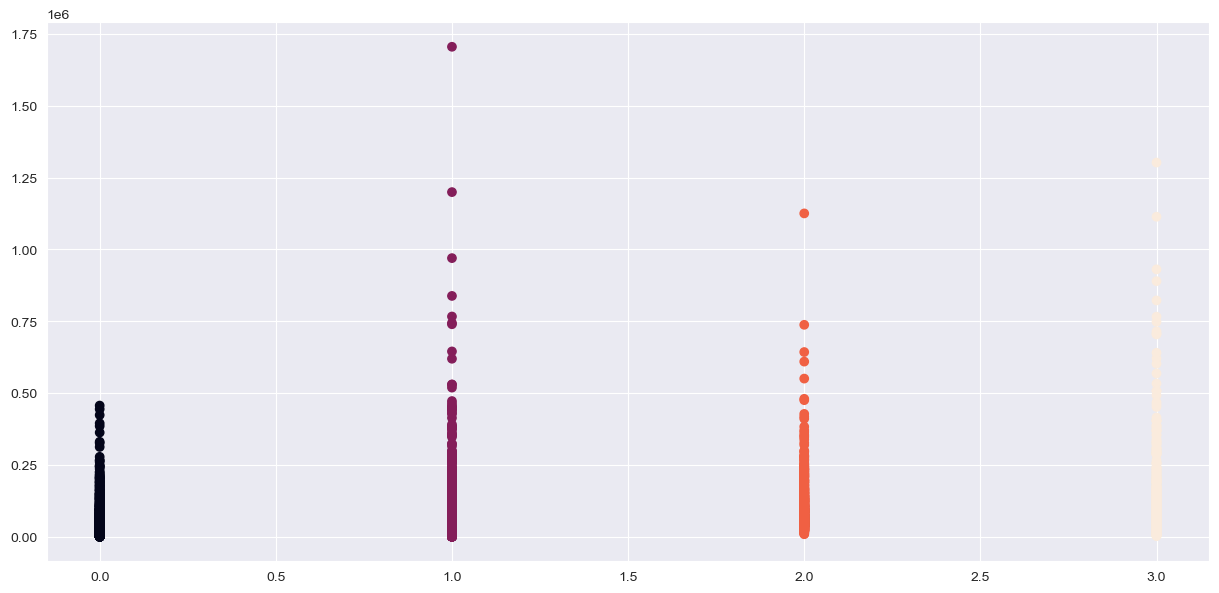

In [24]:
plt.figure(figsize=(15,7))  
plt.scatter(df['Cluster'],df['Balance'], c=df1) 

In [25]:
#KMeans

In [26]:
km = KMeans()
y = km.fit_predict(Airline_norm)
y

array([6, 6, 6, ..., 4, 1, 1])

In [27]:
km.cluster_centers_

array([[ 8.99777108e-02,  1.98682433e-02,  9.02941176e-01,
         8.67361738e-18,  1.47058824e-02,  2.60057433e-01,
         2.66963064e-01,  3.24877980e-02,  5.64927858e-02,
         7.17320813e-01,  1.00000000e+00],
       [ 1.83360325e-02,  9.88146714e-03,  1.78571429e-02,
         7.86924939e-03,  1.21065375e-03,  1.22873057e-02,
         7.26251478e-02,  7.30053638e-03,  1.19237973e-02,
         1.98927753e-01, -4.99600361e-16],
       [ 6.17952747e-02,  3.23767118e-02,  3.91104294e-02,
         1.53374233e-02,  4.60122699e-03,  3.41935459e-02,
         1.25731203e-01,  3.32470266e-02,  6.16969557e-02,
         7.30586528e-01,  1.00000000e+00],
       [ 6.93891884e-02,  6.59020789e-03,  6.46035599e-01,
         8.09061489e-04,  5.66343042e-03,  1.19022293e-01,
         2.00383834e-01,  7.27197078e-03,  1.18458814e-02,
         5.32620376e-01, -3.33066907e-16],
       [ 4.43249950e-02,  1.62822890e-02,  6.02564103e-01,
         1.06837607e-03,  5.34188034e-04,  1.09701763e-01,
  

In [28]:
#Elbow Graph

In [29]:
wcss = []

for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit_predict(Airline_norm)
    wcss.append(km.inertia_)

In [30]:
wcss

[1830.7932128584114,
 823.6756984125207,
 625.1684881570721,
 436.70885761932624,
 348.9433217254137,
 315.1564691705769,
 290.47177162164314,
 263.04891963882994,
 243.92443618938393]

Text(0, 0.5, 'WCSS')

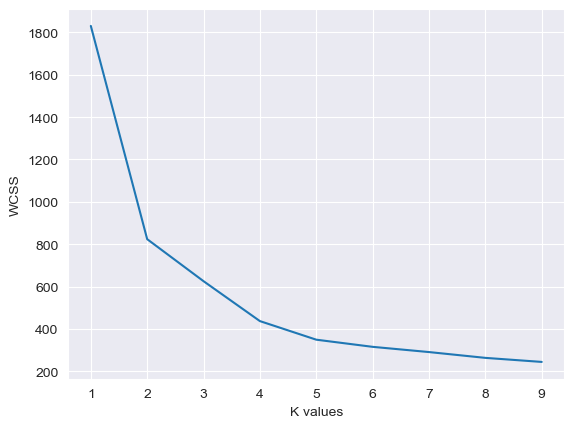

In [31]:
plt.plot(range(1,10), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [32]:
km=KMeans(n_clusters=4,random_state=0)
y1=km.fit_predict(Airline_norm)
y1

array([1, 1, 1, ..., 2, 1, 1])

In [33]:
km.cluster_centers_

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.37681325e-02,  8.07125209e-03,  2.24748810e-02,
         8.98995241e-03,  1.05764146e-03,  1.25750315e-02,
         7.51540344e-02,  7.35667765e-03,  1.24322760e-02,
         4.34424062e-01, -4.99600361e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00],
       [ 6.92010150e-02,  7.21537510e-03,  6.40350877e-01,
         7.97448166e-04,  5.58213716e-03,  1.17843075e-01,
         2.00289307e-01,  7.30214826e-03,  1.19466763e-02,
         5.38787863e-01, -3.88578059e-16]])

In [34]:
df['Cluster'] = y1

In [35]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [36]:
df['Cluster'].value_counts()

1    1891
2     808
0     673
3     627
Name: Cluster, dtype: int64

In [37]:
df.groupby('Cluster').agg(['mean'])


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
Cluster,,,,,,,,,,,
0,83529.153046,290.453195,1.156018,1.032689,1.008915,8850.395245,10.476969,1030.112927,3.148588,4338.867756,1.0
1,40520.815442,89.978318,1.089900,1.017980,1.004231,3315.847171,6.463247,226.710735,0.658911,3605.113168,0.0
2,108317.387376,198.336634,3.915842,1.001238,1.025990,45609.657178,20.201733,713.728960,2.142327,4863.439356,1.0
3,117976.519936,80.437002,3.561404,1.001595,1.022329,31073.451356,17.224880,225.030303,0.633174,4470.706539,0.0


In [38]:
#DBSCAN

In [1]:
from sklearn.metrics import silhouette_score

In [6]:
Airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
ndf=Airline.drop(["ID#"],axis=1)
ndf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
sc=StandardScaler()

In [9]:
sdf=sc.fit_transform(ndf)
sdf

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [10]:
dbscan = DBSCAN(eps=0.82, min_samples=6)
dbscan.fit(sdf)

DBSCAN(eps=0.82, min_samples=6)

In [11]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
ndf['Clusters']=dbscan.labels_
ndf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [13]:
c2 = pd.DataFrame(dbscan.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 0            2222
 1             956
-1             801
 2              13
 3               7
dtype: int64

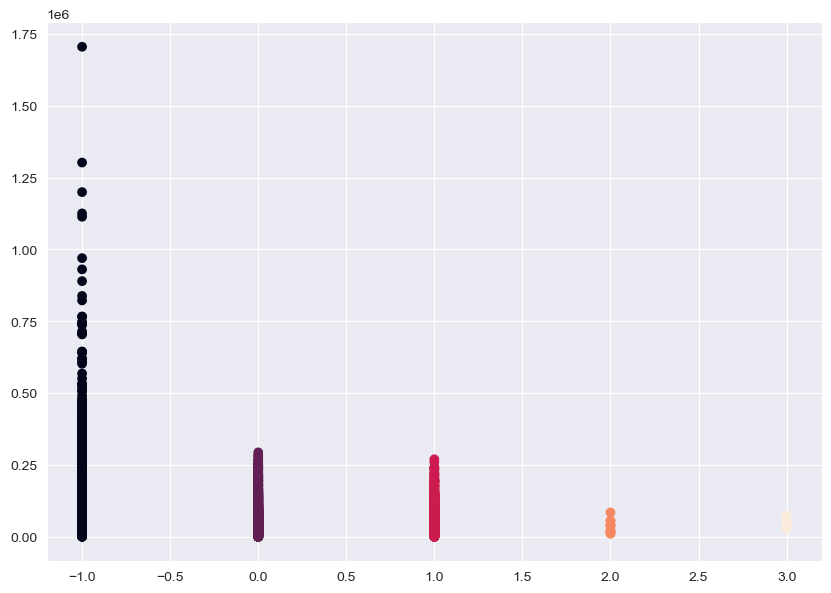

In [14]:
plt.figure(figsize=(10, 7))  
plt.scatter(ndf['Clusters'],ndf['Balance'], c=dbscan.labels_) 

# Problem Statement
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [16]:
Crime=pd.read_csv("crime_data.csv")
Crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [17]:
#EDA

In [18]:
df=Crime.rename({"Unnamed: 0":"State"},axis=1)
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [20]:
df.shape

(50, 5)

In [21]:
df1=df.drop(["State"],axis=1)
df1

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [22]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


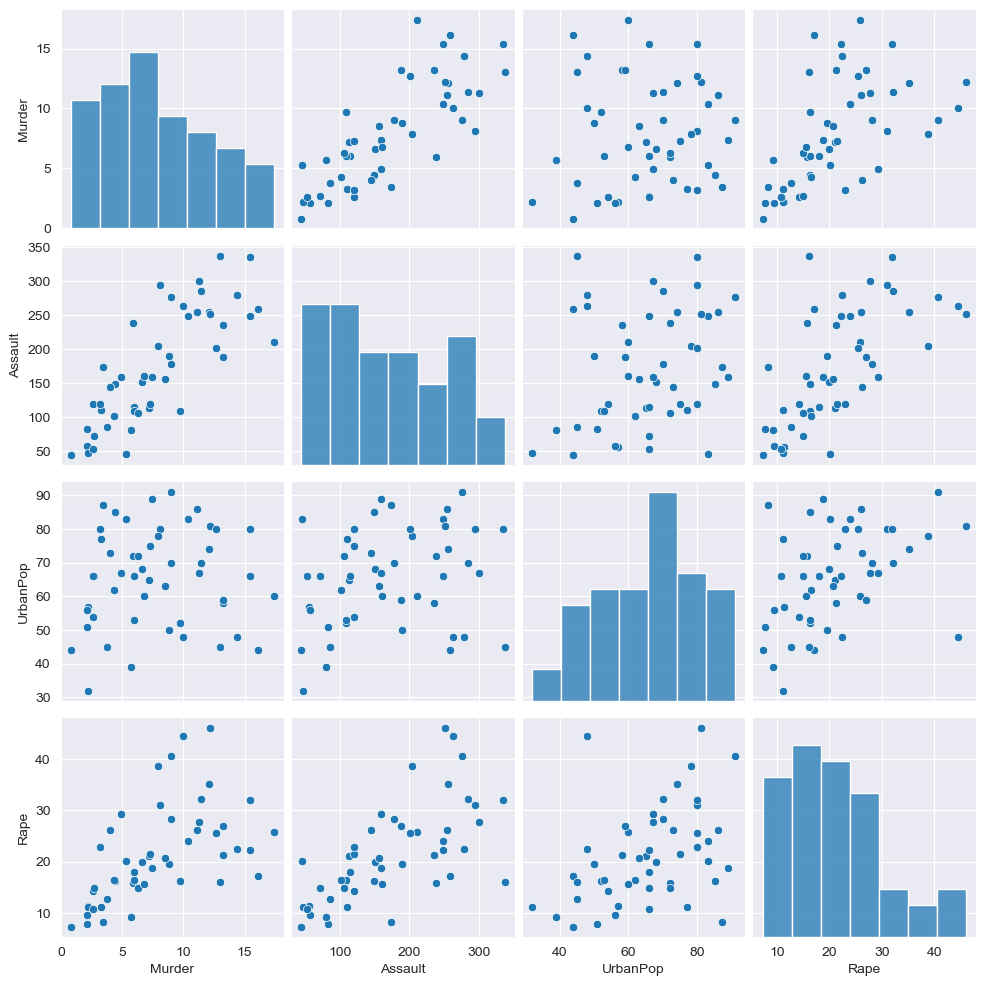

In [23]:
sns.pairplot(df)

<AxesSubplot:>

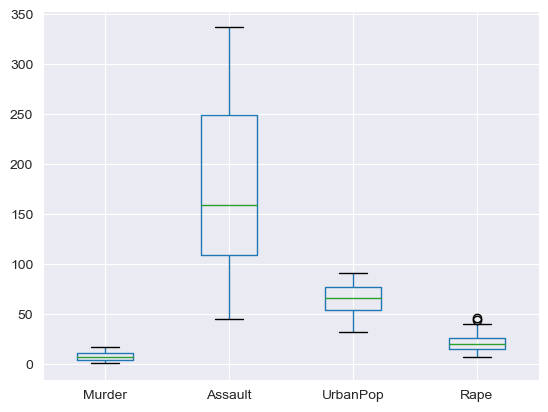

In [24]:
df.boxplot()

In [25]:
#Feature Scaling

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [27]:
df1=sc.fit_transform(df1)
df1

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [28]:
#Hierarchical Clustering

In [29]:
from scipy.cluster import hierarchy

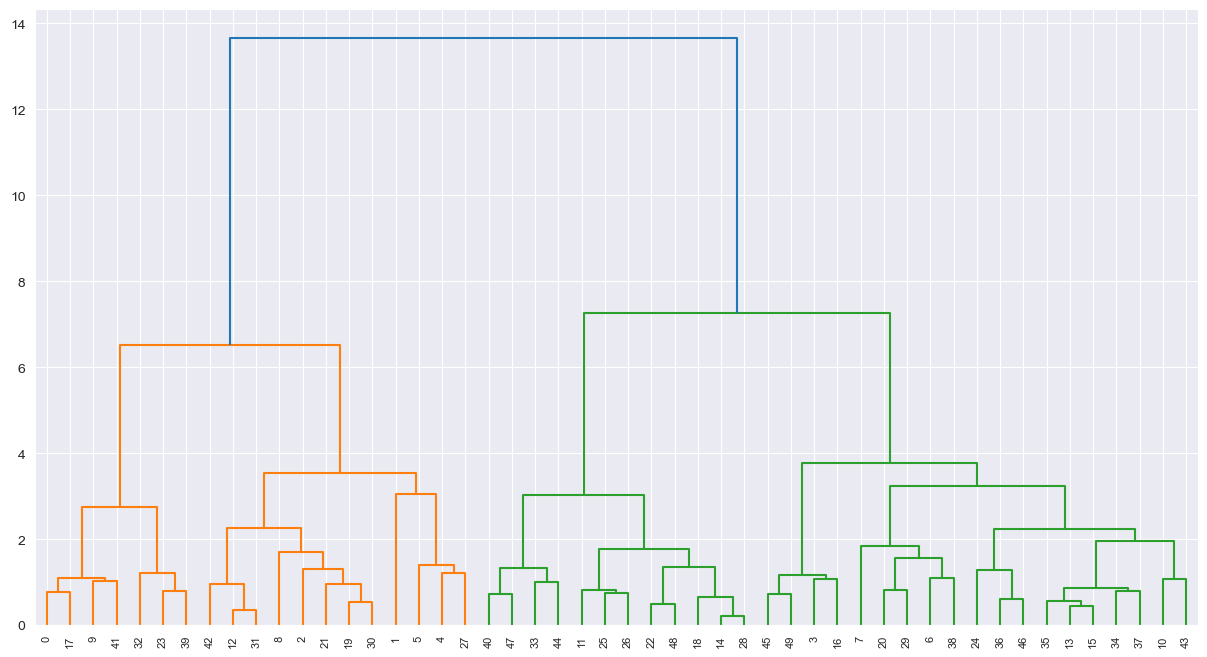

In [30]:
fig = plt.figure(figsize=(15,8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(df1, method="ward"))

In [31]:
from sklearn.cluster import AgglomerativeClustering

In [32]:
hc = AgglomerativeClustering(n_clusters=4)
df2 = hc.fit_predict(df1)

In [33]:
df2

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [34]:
df['Cluster'] = df2

In [35]:
df

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [37]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [38]:
# City which have rate of Assault and rape is very high 
df[df['Cluster']==1]

,State,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [39]:
df.sort_values("Cluster").reset_index()

,index,State,Murder,Assault,UrbanPop,Rape,Cluster
0,24,Missouri,9.0,178,70,28.2,0
1,46,Washington,4.0,145,73,26.2,0
2,45,Virginia,8.5,156,63,20.7,0
3,43,Utah,3.2,120,80,22.9,0
4,38,Rhode Island,3.4,174,87,8.3,0
5,37,Pennsylvania,6.3,106,72,14.9,0
6,36,Oregon,4.9,159,67,29.3,0
7,35,Oklahoma,6.6,151,68,20.0,0
8,34,Ohio,7.3,120,75,21.4,0
9,29,New Jersey,7.4,159,89,18.8,0


In [40]:
df['Cluster'].value_counts()

0    19
1    12
2    12
3     7
Name: Cluster, dtype: int64

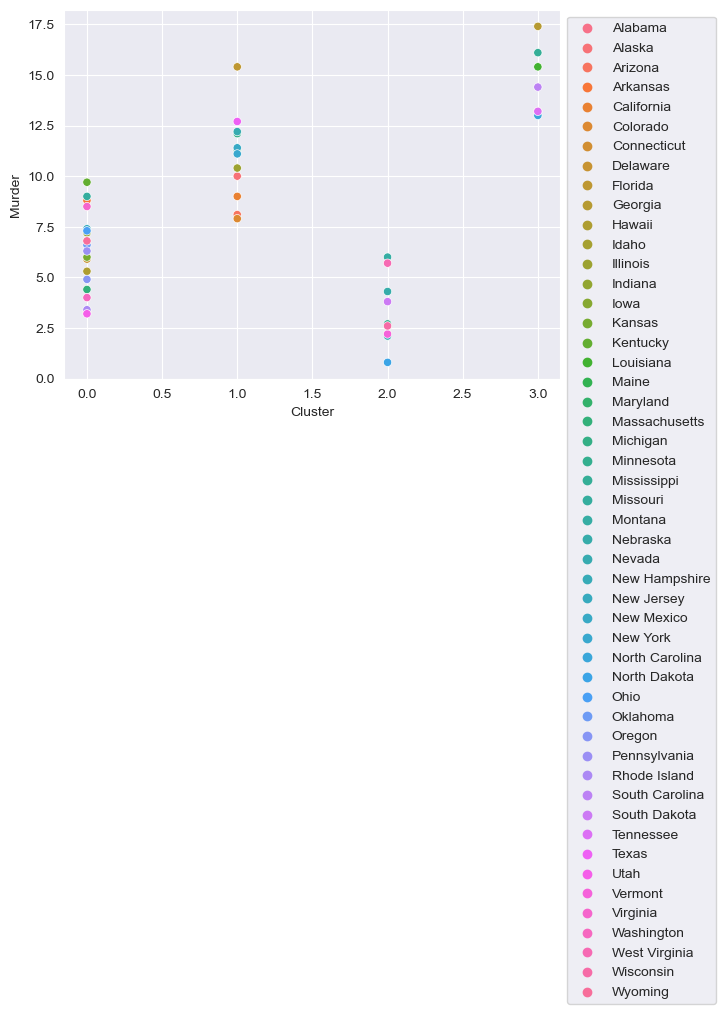

In [41]:
sns.scatterplot(df['Cluster'],df['Murder'],hue=df['State'])
plt.legend(bbox_to_anchor = (1,1))

In [42]:
#KMeans

In [43]:
from sklearn.cluster import KMeans

In [45]:
#Elbow Graph

In [46]:
wcss = []

for i in range(1,15):
    km = KMeans(n_clusters=i)
    km.fit_predict(df1)
    wcss.append(km.inertia_)

In [47]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137275,
 57.667578250008035,
 50.07455380829823,
 43.92746404497574,
 39.79184637634114,
 36.47505138374809,
 31.61746352546432,
 28.31660598869888,
 26.56023775854051,
 22.278929731190203,
 21.08974937969957,
 19.755235776959182]

Text(0, 0.5, 'WCSS')

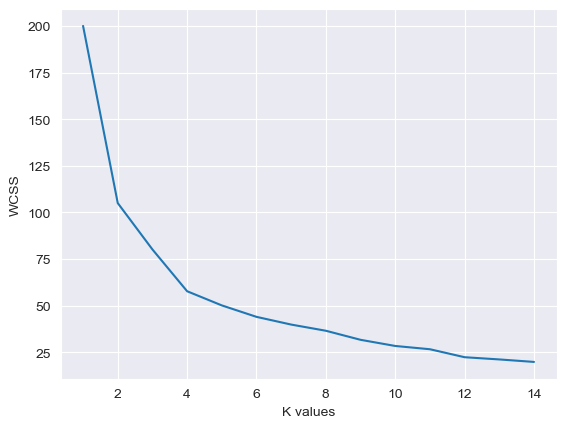

In [48]:
plt.plot(range(1,15), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [49]:
km=KMeans(n_clusters=4,random_state=0)
y1=km.fit_predict(df1)
y1

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [50]:
km.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669]])

In [51]:
df['Cluster'] = y1

In [52]:
df

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [53]:
df['Cluster'].value_counts()

0    16
1    13
2    13
3     8
Name: Cluster, dtype: int64

In [54]:
df.groupby('Cluster').agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
Cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,10.815385,257.384615,76.000000,33.192308
2,3.600000,78.538462,52.076923,12.176923
3,13.937500,243.625000,53.750000,21.412500


In [55]:
#DBSCAN

In [56]:
from sklearn.cluster import DBSCAN

In [57]:
from sklearn.metrics import silhouette_score

In [58]:
dbscan = DBSCAN(eps=0.98, min_samples=3)
dbscan.fit(df1)

DBSCAN(eps=0.98, min_samples=3)

In [59]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0, -1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1, -1,  1,  1,  1,  1,  1],
      dtype=int64)

In [60]:
df['clusters']=dbscan.labels_
df

,State,Murder,Assault,UrbanPop,Rape,Cluster,clusters
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,1,-1
2,Arizona,8.1,294,80,31.0,1,-1
3,Arkansas,8.8,190,50,19.5,3,-1
4,California,9.0,276,91,40.6,1,-1
5,Colorado,7.9,204,78,38.7,1,-1
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,0,-1
8,Florida,15.4,335,80,31.9,1,-1
9,Georgia,17.4,211,60,25.8,3,0


In [61]:
c2 = pd.DataFrame(dbscan.labels_,columns=['Cluster ID'])
c2.value_counts()

Cluster ID
 1            26
-1            12
 0             6
 2             3
 3             3
dtype: int64

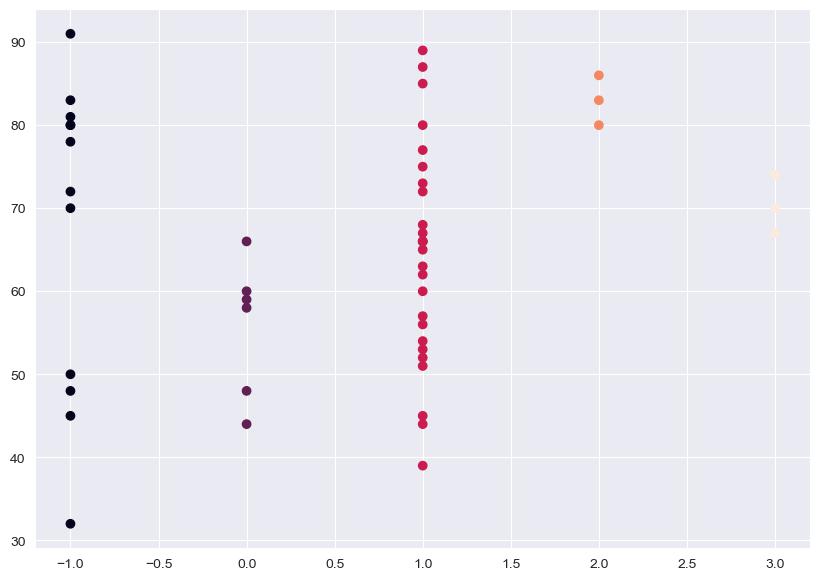

In [62]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['clusters'],df['UrbanPop'], c=dbscan.labels_) 